[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/example_notebooks/autoregression_yosemite_temps.ipynb)

# LSTM

LSTM model has analogous hyperparameters to NP:
* n_lags: defines the sequence length
* n_forecasts: defines how many timestamps in the future we predict
* num_hidden_layers: number of layers in LSTM
* d_hidden: dimension of hidden layers in LSTM

It shares the training configuration parameters with NP.

It also includes additional LSTM-specific parameters:
* lstm_bias = True,
* lstm_biderectional = False

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from neuralprophet.forecaster_additional_models import LSTM

In [3]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    data_location = "https://raw.githubusercontent.com/ourownstory/neural_prophet/master/"
else:
    data_location = "../"

df = pd.read_csv(data_location + "example_data/yosemite_temps.csv")
df.head(3)

,ds,y
0,2017-05-01 00:00:00,27.8
1,2017-05-01 00:05:00,27.0
2,2017-05-01 00:10:00,26.8


In [3]:
m = LSTM(n_lags = 10,
            n_forecasts=3,
            num_hidden_layers=1,
            d_hidden=64,
            learning_rate=0.1,
            epochs=10,
            batch_size=None,
            loss_func="Huber",
            optimizer="AdamW",
            train_speed=None,
            normalize="auto",
            impute_missing=True,
            lstm_bias = True,
            lstm_bidirectional = False)

In [4]:
metrics_df = m.fit(df.iloc[:-10], freq = '5min', validate_each_epoch=True)

WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
  0%|          | 0/10 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name      | Type         | Params
-------------------------------------------
0 | lstm      | LSTM         | 19.5 K
1 | linear    | Linear       | 195   
2 | loss_func | SmoothL1Loss | 0     
-------------------------------------------
19.7 K    Trainable params
0         Non-trainable params
19.7 K    Total params
0.079     Total est

Validation sanity check: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)



Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [23]:
metrics_df

,SmoothL1Loss,MAE,MSE,SmoothL1Loss_val,MAE_val,MSE_val
0,0.014211,5.541000,77.169669,0.255487,34.589251,1394.884888
1,0.001012,1.714947,5.494068,0.001254,1.886763,6.807053
2,0.000884,1.573572,4.800743,0.001157,1.737445,6.278502
3,0.000776,1.464207,4.211703,0.001062,1.669603,5.766971
4,0.000676,1.359969,3.671223,0.000965,1.663113,5.236597
5,0.000572,1.246241,3.107737,0.000764,1.425630,4.146850
6,0.000460,1.104971,2.495160,0.000612,1.276926,3.322453
7,0.000352,0.929249,1.911991,0.000433,1.137409,2.353118
8,0.000286,0.789808,1.551241,0.000242,0.802851,1.315862
9,0.000268,0.739404,1.452682,0.000150,0.632587,0.815452


In [24]:
metrics = m.test(df.iloc[:-10])

WARNING - (py.warnings._showwarnmsg) - /Users/polina/fds/neural_prophet/venv/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)

WARNING - (py.warnings._showwarnmsg) - /Users/polina/fds/neural_prophet/venv/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)



Testing: 0it [00:00, ?it/s]

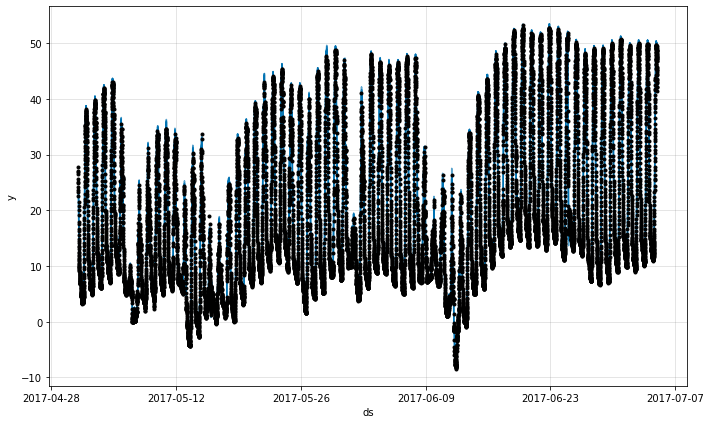

In [25]:
future = m.make_future_dataframe(df, n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)

In [26]:
m = LSTM(n_lags=6*12,
            n_forecasts=3*12,
            num_hidden_layers=1,
            d_hidden=64,
            learning_rate=0.1,
            epochs=10,
            batch_size=None,
            loss_func="Huber",
            optimizer="AdamW",
            train_speed=None,
            normalize="auto",
            impute_missing=True,
            lstm_bias = True,
            lstm_bidirectional = False)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
  0%|          | 0/10 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
WARNING - (py.warnings._showwarnmsg) - /Users/polina/fds/neural_prophet/venv/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)


  | Name      | Type         | Params
-------------------------------------------
0 | lstm      | LSTM         | 35.3 K
1 | linear    | Linear       | 2.3 K 
2 | loss_func | SmoothL1Loss | 0     
-------------------------------------------
37.7 K    Trainable params
0         Non-trainable params
37.7 K    Total params
0.151     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/polina/fds/neural_prophet/venv/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)



Training: 0it [00:00, ?it/s]

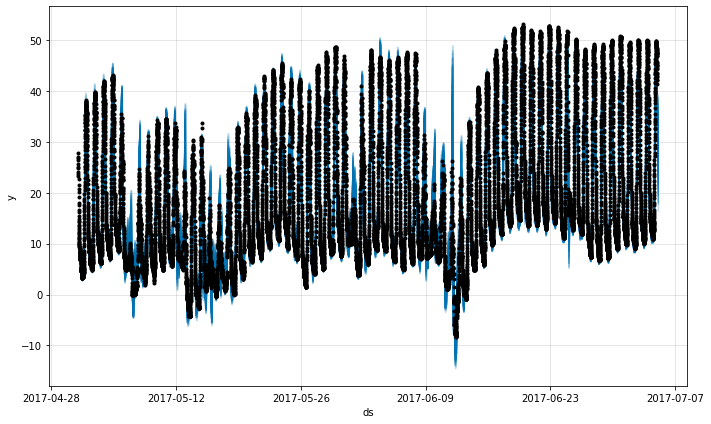

In [27]:
metrics = m.fit(df, freq='5min')
future = m.make_future_dataframe(df, n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)

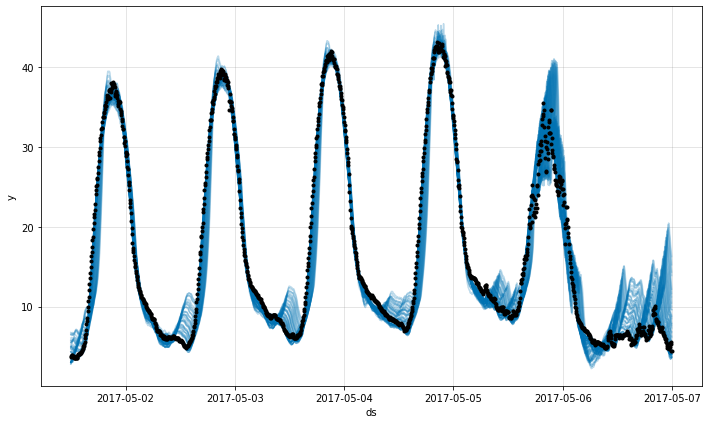

In [28]:
fig = m.plot(forecast[144:6*288])

In [4]:
from ray.tune.schedulers import ASHAScheduler, PopulationBasedTraining
from ray.tune.integration.pytorch_lightning import TuneReportCallback, TuneReportCheckpointCallback
from ray import tune
from ray.tune import CLIReporter
import pytorch_lightning as pl


WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)



In [5]:
num_epochs = 10

In [6]:
def train_mnist_tune(config, num_epochs=100):
    m = LSTM(**config)
    train_loader, val_loader, model = m._hyperparameter_optimization(df, '5min')
    
    trainer = pl.Trainer(
        max_epochs=num_epochs,
        progress_bar_refresh_rate=0,
        num_sanity_val_steps=0,
        auto_lr_find=False, 
        callbacks = TuneReportCallback({
    "loss": "val_loss"}, on="validation_end")
        )
    print(model)
    trainer.fit(model, train_dataloader = train_loader, val_dataloaders = val_loader)

In [7]:
config = {
        "learning_rate": tune.loguniform(1e-4, 1e-1),
        "d_hidden": tune.choice([8, 64, 128]),
        "n_lags": tune.choice([10, 30, 100]),
        "num_hidden_layers": tune.choice([2, 8, 16]),
        "lstm_bias": tune.choice([False, True]),
        "lstm_bidirectional": tune.choice([False, True]),
    }



In [8]:
scheduler = ASHAScheduler(
        max_t=num_epochs,
        grace_period=1,
        reduction_factor=2
)
reporter = CLIReporter(
        parameter_columns=["learning_rate", "d_hidden", "n_lags", "num_hidden_layers",
                           "lstm_bias", "lstm_bidirectional"],
        metric_columns=["loss", "training_iteration"])

In [9]:
analysis = tune.run(
    tune.with_parameters(
        train_mnist_tune,
        num_epochs=num_epochs),
    resources_per_trial={
        "cpu": 1},
    metric="loss",
    mode="min",
    config=config,
    num_samples=10,
#     verbose=False,
    scheduler=scheduler,
    progress_reporter=reporter,
    name="tune_mnist_asha", log_to_file=False,
    checkpoint_freq=0,
    raise_on_failed_trial=False,)

print("Best hyperparameters found were: ", analysis.best_config)

2021-05-09 17:12:36,699	INFO services.py:1269 -- View the Ray dashboard at http://127.0.0.1:8266
2021-05-09 17:12:38,528	WARNING function_runner.py:545 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


== Status ==
Memory usage on this node: 14.4/16.0 GiB: ***LOW MEMORY*** less than 10% of the memory on this node is available for use. This can cause unexpected crashes. Consider reducing the memory used by your application or reducing the Ray object store size by setting `object_store_memory` when calling `ray.init`.
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 1.0/8 CPUs, 0/0 GPUs, 0.0/8.52 GiB heap, 0.0/4.26 GiB objects
Result logdir: /Users/polina/ray_results/tune_mnist_asha
Number of trials: 10/10 (9 PENDING, 1 RUNNING)
+------------------------------+----------+-------+-----------------+------------+----------+---------------------+-------------+----------------------+
| Trial name                   | status   | loc   |   learning_rate |   d_hidden |   n_lags |   num_hidden_layers | lstm_bias   | lstm_bidirectional   |
|------------------------------+----------+-------+-----------------

(pid=14656) INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
(pid=14656) INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 66
  0%|          | 0/66 [00:00<?, ?it/s]GPU available: False, used: False
(pid=14656) TPU available: False, using: 0 TPU cores
(pid=14656) GPU available: False, used: False
(pid=14656) TPU available: False, using: 0 TPU cores
(pid=14656) 
(pid=14656)   | Name      | Type         | Params
(pid=14656) -------------------------------------------
(pid=14656) 0 | lstm      | LSTM         | 541 K 
(pid=14656) 1 | linear    | Linear       | 65    
(pid=14656) 2 | loss_func | SmoothL1Loss | 0     
(pid=14656) -------------------------------------------
(pid=14656) 541 K     Trainable params
(pid=14656) 0         Non-trainable params
(pid=14656) 541 K     Total params
(pid=14656) 2.167     Total estimated model params size (MB)
(pid=14656) WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packag

(pid=14656) LightLSTM(
(pid=14656)   (lstm): LSTM(100, 64, num_layers=16)
(pid=14656)   (linear): Linear(in_features=64, out_features=1, bias=True)
(pid=14656)   (loss_func): SmoothL1Loss()
(pid=14656) )
(pid=14657) LightLSTM(
(pid=14657)   (lstm): LSTM(100, 8, num_layers=2, bias=False, bidirectional=True)
(pid=14657)   (linear): Linear(in_features=16, out_features=1, bias=True)
(pid=14657)   (loss_func): SmoothL1Loss()
(pid=14657) )
(pid=14653) LightLSTM(
(pid=14653)   (lstm): LSTM(30, 64, num_layers=2, bias=False)
(pid=14653)   (linear): Linear(in_features=64, out_features=1, bias=True)
(pid=14653)   (loss_func): SmoothL1Loss()
(pid=14653) )


  0%|          | 0/66 [00:00<?, ?it/s]GPU available: False, used: False
(pid=14657) TPU available: False, using: 0 TPU cores
(pid=14657) GPU available: False, used: False
(pid=14657) TPU available: False, using: 0 TPU cores
(pid=14657) 
(pid=14657)   | Name      | Type         | Params
(pid=14657) -------------------------------------------
(pid=14657) 0 | lstm      | LSTM         | 8.4 K 
(pid=14657) 1 | linear    | Linear       | 17    
(pid=14657) 2 | loss_func | SmoothL1Loss | 0     
(pid=14657) -------------------------------------------
(pid=14657) 8.5 K     Trainable params
(pid=14657) 0         Non-trainable params
(pid=14657) 8.5 K     Total params
(pid=14657) 0.034     Total estimated model params size (MB)
(pid=14657) WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consi

  0%|          | 0/66 [00:00<?, ?it/s]GPU available: False, used: False
(pid=14655) TPU available: False, using: 0 TPU cores
(pid=14655) GPU available: False, used: False
(pid=14655) TPU available: False, using: 0 TPU cores
(pid=14655) 
(pid=14655)   | Name      | Type         | Params
(pid=14655) -------------------------------------------
(pid=14655) 0 | lstm      | LSTM         | 1.7 K 
(pid=14655) 1 | linear    | Linear       | 9     
(pid=14655) 2 | loss_func | SmoothL1Loss | 0     
(pid=14655) -------------------------------------------
(pid=14655) 1.7 K     Trainable params
(pid=14655) 0         Non-trainable params
(pid=14655) 1.7 K     Total params
(pid=14655) 0.007     Total estimated model params size (MB)
(pid=14655) WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consi

(pid=14658) LightLSTM(
(pid=14658)   (lstm): LSTM(10, 64, num_layers=2, bidirectional=True)
(pid=14658)   (linear): Linear(in_features=128, out_features=1, bias=True)
(pid=14658)   (loss_func): SmoothL1Loss()
(pid=14658) )
(pid=14654) LightLSTM(
(pid=14654)   (lstm): LSTM(30, 8, num_layers=8, bidirectional=True)
(pid=14654)   (linear): Linear(in_features=64, out_features=1, bias=True)
(pid=14654)   (loss_func): SmoothL1Loss()
(pid=14654) )
(pid=14652) LightLSTM(
(pid=14652)   (lstm): LSTM(10, 64, num_layers=8)
(pid=14652)   (linear): Linear(in_features=64, out_features=1, bias=True)
(pid=14652)   (loss_func): SmoothL1Loss()
(pid=14652) )
(pid=14659) LightLSTM(
(pid=14659)   (lstm): LSTM(100, 128, num_layers=2)
(pid=14659)   (linear): Linear(in_features=128, out_features=1, bias=True)
(pid=14659)   (loss_func): SmoothL1Loss()
(pid=14659) )
(pid=14655) LightLSTM(
(pid=14655)   (lstm): LSTM(30, 8, num_layers=2, bias=False)
(pid=14655)   (linear): Linear(in_features=8, out_features=1, bias

                                      
(raylet) /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
                                      
                                      


== Status ==
Memory usage on this node: 14.3/16.0 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 8.0/8 CPUs, 0/0 GPUs, 0.0/8.52 GiB heap, 0.0/4.26 GiB objects
Result logdir: /Users/polina/ray_results/tune_mnist_asha
Number of trials: 10/10 (1 ERROR, 1 PENDING, 8 RUNNING)
+------------------------------+----------+-------+-----------------+------------+----------+---------------------+-------------+----------------------+
| Trial name                   | status   | loc   |   learning_rate |   d_hidden |   n_lags |   num_hidden_layers | lstm_bias   | lstm_bidirectional   |
|------------------------------+----------+-------+-----------------+------------+----------+---------------------+-------------+----------------------|
| train_mnist_tune_9c361_00000 | RUNNING  |       |     0.0014247   |          8 |      100 |                   2 | False       | True                 |
| train_mnist_tune_

                                      
                                      
                                      
(pid=14686) INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
(pid=14686) INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 66
  0%|          | 0/66 [00:00<?, ?it/s]GPU available: False, used: False
(pid=14686) TPU available: False, using: 0 TPU cores
(pid=14686) GPU available: False, used: False
(pid=14686) TPU available: False, using: 0 TPU cores
(pid=14686) 
(pid=14686)   | Name      | Type         | Params
(pid=14686) -------------------------------------------
(pid=14686) 0 | lstm      | LSTM         | 1.5 M 
(pid=14686) 1 | linear    | Linear       | 1.0 K 
(pid=14686) 2 | loss_func | SmoothL1Loss | 0     
(pid=14686) -------------------------------------------
(pid=14686) 1.5 M     Trainable params
(pid=14686) 0         Non-trainable params
(pid=14686) 1.5 M     Total params
(pid=14686) 6.160     Total estimated model params size (MB)


(pid=14686) LightLSTM(
(pid=14686)   (lstm): LSTM(30, 64, num_layers=16, bidirectional=True)
(pid=14686)   (linear): Linear(in_features=1024, out_features=1, bias=True)
(pid=14686)   (loss_func): SmoothL1Loss()
(pid=14686) )


(pid=14686) 2021-05-09 17:12:45,955	ERROR function_runner.py:254 -- Runner Thread raised error.
(pid=14686) Traceback (most recent call last):
(pid=14686)   File "/Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=14686)     self._entrypoint()
(pid=14686)   File "/Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/ray/tune/function_runner.py", line 316, in entrypoint
(pid=14686)     self._status_reporter.get_checkpoint())
(pid=14686)   File "/Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/ray/tune/function_runner.py", line 580, in _trainable_func
(pid=14686)     output = fn()
(pid=14686)   File "/Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/ray/tune/utils/trainable.py", line 339, in _inner
(pid=14686)     inner(config, checkpoint_dir=None)
(pid=14686)   File "/Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/ray/tune/utils/trainable.py", 

Result for train_mnist_tune_9c361_00008:
  {}
  


                                      
(raylet) /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
(raylet)   "update your install command.", FutureWarning)
                                      


Result for train_mnist_tune_9c361_00002:
  date: 2021-05-09_17-12-48
  done: false
  experiment_id: 029a437d639a420aa122df9cfaed9ba0
  hostname: MacBook-Pro-Polina.local
  iterations_since_restore: 1
  loss: 0.034117236733436584
  node_ip: 192.168.0.7
  pid: 14655
  time_since_restore: 6.776753902435303
  time_this_iter_s: 6.776753902435303
  time_total_s: 6.776753902435303
  timestamp: 1620569568
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 9c361_00002
  


(pid=14693) INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
(pid=14693) INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 66
  0%|          | 0/66 [00:00<?, ?it/s]GPU available: False, used: False
(pid=14693) TPU available: False, using: 0 TPU cores
(pid=14693) GPU available: False, used: False
(pid=14693) TPU available: False, using: 0 TPU cores
(pid=14693) 
(pid=14693)   | Name      | Type         | Params
(pid=14693) -------------------------------------------
(pid=14693) 0 | lstm      | LSTM         | 26.2 K
(pid=14693) 1 | linear    | Linear       | 129   
(pid=14693) 2 | loss_func | SmoothL1Loss | 0     
(pid=14693) -------------------------------------------
(pid=14693) 26.4 K    Trainable params
(pid=14693) 0         Non-trainable params
(pid=14693) 26.4 K    Total params
(pid=14693) 0.105     Total estimated model params size (MB)
(pid=14693) WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packag

Result for train_mnist_tune_9c361_00006:
  date: 2021-05-09_17-12-49
  done: true
  experiment_id: 5b2b4a16b6764bd0888816c72eff61bf
  hostname: MacBook-Pro-Polina.local
  iterations_since_restore: 1
  loss: 0.2194511741399765
  node_ip: 192.168.0.7
  pid: 14653
  time_since_restore: 8.148314952850342
  time_this_iter_s: 8.148314952850342
  time_total_s: 8.148314952850342
  timestamp: 1620569569
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 9c361_00006
  (pid=14693) LightLSTM(

(pid=14693)   (lstm): LSTM(10, 8, num_layers=16, bidirectional=True)
(pid=14693)   (linear): Linear(in_features=128, out_features=1, bias=True)
(pid=14693)   (loss_func): SmoothL1Loss()
(pid=14693) )
== Status ==
Memory usage on this node: 14.3/16.0 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: -0.12678420543670654
Resources requested: 7.0/8 CPUs, 0/0 GPUs, 0.0/8.52 GiB heap, 0.0/4.26 GiB objects
Current best trial: 9c361_0

(pid=14693) 2021-05-09 17:12:49,856	ERROR function_runner.py:254 -- Runner Thread raised error.
(pid=14693) Traceback (most recent call last):
(pid=14693)   File "/Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/ray/tune/function_runner.py", line 248, in run
(pid=14693)     self._entrypoint()
(pid=14693)   File "/Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/ray/tune/function_runner.py", line 316, in entrypoint
(pid=14693)     self._status_reporter.get_checkpoint())
(pid=14693)   File "/Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/ray/tune/function_runner.py", line 580, in _trainable_func
(pid=14693)     output = fn()
(pid=14693)   File "/Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/ray/tune/utils/trainable.py", line 339, in _inner
(pid=14693)     inner(config, checkpoint_dir=None)
(pid=14693)   File "/Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/ray/tune/utils/trainable.py", 

Result for train_mnist_tune_9c361_00009:
  {}
  


Result for train_mnist_tune_9c361_00000:
  date: 2021-05-09_17-12-53
  done: false
  experiment_id: 3acb9b1c1a8a49b6995a4f4857f049cf
  hostname: MacBook-Pro-Polina.local
  iterations_since_restore: 1
  loss: 0.09188315272331238
  node_ip: 192.168.0.7
  pid: 14657
  time_since_restore: 11.662551879882812
  time_this_iter_s: 11.662551879882812
  time_total_s: 11.662551879882812
  timestamp: 1620569573
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 9c361_00000
  
Result for train_mnist_tune_9c361_00003:
  date: 2021-05-09_17-12-53
  done: false
  experiment_id: 62b5d59a23704a5aa69ad418ff2a5f05
  hostname: MacBook-Pro-Polina.local
  iterations_since_restore: 1
  loss: 0.003016482573002577
  node_ip: 192.168.0.7
  pid: 14659
  time_since_restore: 11.779263973236084
  time_this_iter_s: 11.779263973236084
  time_total_s: 11.779263973236084
  timestamp: 1620569573
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 9c361_00003
  
Result for train_mnist_tune_9c361

Result for train_mnist_tune_9c361_00007:
  date: 2021-05-09_17-13-06
  done: false
  experiment_id: 8ecba8a04ec8408ba34a5165627fb935
  hostname: MacBook-Pro-Polina.local
  iterations_since_restore: 1
  loss: 0.051999203860759735
  node_ip: 192.168.0.7
  pid: 14652
  time_since_restore: 25.18635869026184
  time_this_iter_s: 25.18635869026184
  time_total_s: 25.18635869026184
  timestamp: 1620569586
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 9c361_00007
  
Result for train_mnist_tune_9c361_00002:
  date: 2021-05-09_17-13-08
  done: false
  experiment_id: 029a437d639a420aa122df9cfaed9ba0
  hostname: MacBook-Pro-Polina.local
  iterations_since_restore: 5
  loss: 0.0017254886915907264
  node_ip: 192.168.0.7
  pid: 14655
  time_since_restore: 26.82340407371521
  time_this_iter_s: 4.316925287246704
  time_total_s: 26.82340407371521
  timestamp: 1620569588
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 9c361_00002
  
== Status ==
Memory usage on this nod

Result for train_mnist_tune_9c361_00003:
  date: 2021-05-09_17-13-18
  done: false
  experiment_id: 62b5d59a23704a5aa69ad418ff2a5f05
  hostname: MacBook-Pro-Polina.local
  iterations_since_restore: 4
  loss: 0.0003604093799367547
  node_ip: 192.168.0.7
  pid: 14659
  time_since_restore: 37.03157591819763
  time_this_iter_s: 7.8024749755859375
  time_total_s: 37.03157591819763
  timestamp: 1620569598
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 9c361_00003
  
Result for train_mnist_tune_9c361_00002:
  date: 2021-05-09_17-13-25
  done: false
  experiment_id: 029a437d639a420aa122df9cfaed9ba0
  hostname: MacBook-Pro-Polina.local
  iterations_since_restore: 9
  loss: 0.00029759423341602087
  node_ip: 192.168.0.7
  pid: 14655
  time_since_restore: 43.3281090259552
  time_this_iter_s: 4.151042938232422
  time_total_s: 43.3281090259552
  timestamp: 1620569605
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 9c361_00002
  
== Status ==
Memory usage on this no

Result for train_mnist_tune_9c361_00003:
  date: 2021-05-09_17-13-33
  done: false
  experiment_id: 62b5d59a23704a5aa69ad418ff2a5f05
  hostname: MacBook-Pro-Polina.local
  iterations_since_restore: 6
  loss: 0.00020574848167598248
  node_ip: 192.168.0.7
  pid: 14659
  time_since_restore: 52.2077910900116
  time_this_iter_s: 7.388936996459961
  time_total_s: 52.2077910900116
  timestamp: 1620569613
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 9c361_00003
  
== Status ==
Memory usage on this node: 14.1/16.0 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.00040544281364418566 | Iter 4.000: -0.0020837789052166045 | Iter 2.000: -0.040903035551309586 | Iter 1.000: -0.09188315272331238
Resources requested: 1.0/8 CPUs, 0/0 GPUs, 0.0/8.52 GiB heap, 0.0/4.26 GiB objects
Current best trial: 9c361_00003 with loss=0.00020574848167598248 and parameters={'learning_rate': 0.07144202950325802, 'd_hidden': 128, 'n_lags': 100, 'num_hidden_layers': 2, 'lstm_bias': True,

Result for train_mnist_tune_9c361_00003:
  date: 2021-05-09_17-13-48
  done: false
  experiment_id: 62b5d59a23704a5aa69ad418ff2a5f05
  hostname: MacBook-Pro-Polina.local
  iterations_since_restore: 8
  loss: 7.554546755272895e-05
  node_ip: 192.168.0.7
  pid: 14659
  time_since_restore: 67.04686903953552
  time_this_iter_s: 7.411077976226807
  time_total_s: 67.04686903953552
  timestamp: 1620569628
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 9c361_00003
  
== Status ==
Memory usage on this node: 14.1/16.0 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 8.000: -0.0002404941405984573 | Iter 4.000: -0.0020837789052166045 | Iter 2.000: -0.040903035551309586 | Iter 1.000: -0.09188315272331238
Resources requested: 1.0/8 CPUs, 0/0 GPUs, 0.0/8.52 GiB heap, 0.0/4.26 GiB objects
Current best trial: 9c361_00003 with loss=7.554546755272895e-05 and parameters={'learning_rate': 0.07144202950325802, 'd_hidden': 128, 'n_lags': 100, 'num_hidden_layers': 2, 'lstm_bias': True, 

2021-05-09 17:14:03,347	ERROR tune.py:545 -- Trials did not complete: [train_mnist_tune_9c361_00004, train_mnist_tune_9c361_00008, train_mnist_tune_9c361_00009]
2021-05-09 17:14:03,347	INFO tune.py:549 -- Total run time: 84.83 seconds (84.68 seconds for the tuning loop).


Result for train_mnist_tune_9c361_00003:
  date: 2021-05-09_17-14-03
  done: true
  experiment_id: 62b5d59a23704a5aa69ad418ff2a5f05
  hostname: MacBook-Pro-Polina.local
  iterations_since_restore: 10
  loss: 5.518297984963283e-05
  node_ip: 192.168.0.7
  pid: 14659
  time_since_restore: 81.59373903274536
  time_this_iter_s: 7.233853101730347
  time_total_s: 81.59373903274536
  timestamp: 1620569643
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 9c361_00003
  
== Status ==
Memory usage on this node: 14.1/16.0 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 8.000: -0.0002404941405984573 | Iter 4.000: -0.0020837789052166045 | Iter 2.000: -0.040903035551309586 | Iter 1.000: -0.09188315272331238
Resources requested: 0/8 CPUs, 0/0 GPUs, 0.0/8.52 GiB heap, 0.0/4.26 GiB objects
Current best trial: 9c361_00003 with loss=5.518297984963283e-05 and parameters={'learning_rate': 0.07144202950325802, 'd_hidden': 128, 'n_lags': 100, 'num_hidden_layers': 2, 'lstm_bias': True, '

In [14]:
analysis.results_df[['config.learning_rate', 'config.d_hidden', 'config.n_lags',
       'config.num_hidden_layers', 'config.lstm_bias',
       'config.lstm_bidirectional']]

,config.learning_rate,config.d_hidden,config.n_lags,config.num_hidden_layers,config.lstm_bias,config.lstm_bidirectional
trial_id,,,,,,
9c361_00000,0.001425,8.0,100.0,2.0,False,True
9c361_00001,0.000500,64.0,100.0,16.0,True,False
9c361_00002,0.029585,8.0,30.0,2.0,False,False
9c361_00003,0.071442,128.0,100.0,2.0,True,False
NaN,NaN,NaN,NaN,NaN,NaN,NaN
9c361_00005,0.000265,64.0,10.0,2.0,True,True
9c361_00006,0.000140,64.0,30.0,2.0,False,False
9c361_00007,0.048702,64.0,10.0,8.0,True,False
NaN,NaN,NaN,NaN,NaN,NaN,NaN
